In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob

### Read Data

In [23]:
data = pd.read_csv('C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/Elon_musk.csv',encoding="latin-1")
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


### Number of Words

In [24]:
#Number of Words in single tweet
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


### Number of Characters

In [25]:
#Number of characters in single tweet
data['char_count'] = data['Text'].str.len() ## this also includes spaces
data[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


### Average Word Length

In [28]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


### Number of stopwords

In [29]:
stop = stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


### Number of Special Characters

In [30]:
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


### Number of Numerics

In [31]:
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


### Number of Upper Case Words

In [32]:
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


### Pre - Processing

#### Lower Case

In [33]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

### Removing Punctuation

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

### Removal of Stop Words

In [36]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

### Common word removal

In [37]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [38]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### Rare Words Removal

In [39]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [40]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### Spelling correction

In [41]:
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### Tokenization

In [42]:
TextBlob(data['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Stemming

In [44]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

### Lemmatization

In [45]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [46]:
from textblob import Word

In [47]:
import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.corpus.wordnet.synsets("test")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[Synset('trial.n.02'),
 Synset('test.n.02'),
 Synset('examination.n.02'),
 Synset('test.n.04'),
 Synset('test.n.05'),
 Synset('test.n.06'),
 Synset('test.v.01'),
 Synset('screen.v.01'),
 Synset('quiz.v.01'),
 Synset('test.v.04'),
 Synset('test.v.05'),
 Synset('test.v.06'),
 Synset('test.v.07')]

In [48]:
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

### Advanced Text Processing

#### N-grams

In [49]:
TextBlob(data['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

### Term frequency

In [50]:
tf1 = (data['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,nextlevel,1
6,tried,1


### Inverse Document Frequency

In [51]:
for i,word in enumerate(tf1['words']):
      tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))
tf1

,words,tf,idf
0,id_aa_carmack,1,4.166415
1,ray,1,5.035453
2,tracing,1,7.600402
3,cyberpunk,1,5.115496
4,hdr,1,6.907255
5,nextlevel,1,6.907255
6,tried,1,5.808643


### Term Frequency – Inverse Document Frequency (TF-IDF)

In [52]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,id_aa_carmack,1,4.166415,4.166415
1,ray,1,5.035453,5.035453
2,tracing,1,7.600402,7.600402
3,cyberpunk,1,5.115496,5.115496
4,hdr,1,6.907255,6.907255
5,nextlevel,1,6.907255,6.907255
6,tried,1,5.808643,5.808643


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7374 stored elements in Compressed Sparse Row format>

### Bag of Words

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8020 stored elements in Compressed Sparse Row format>

### Sentiment Analysis

In [55]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [56]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

,Text,sentiment
0,kunalb11 im alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.00
2,joerogan spotify interview,0.00
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


### Perform emotion mining

#### Read Data

In [57]:
! pip install future

In [58]:
pip install -U future 

In [59]:
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib
    
%matplotlib inline

In [60]:
from __future__ import division
import os
from nltk.corpus import twitter_samples

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
from nltk.corpus import stopwords

In [63]:
with codecs.open("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/positive-words.txt", "r", encoding = "ISO-8859-1") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [64]:
with codecs.open("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [65]:
with codecs.open("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [66]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [67]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [68]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [70]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

print(tweet_tokens[0])

#FollowFriday


In [71]:
!pip3 install beautifulsoup4

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [91]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [92]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [93]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [94]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [95]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [96]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,One Plus Nord Ce2 Lite 5g,A Midrange phone from oneplus. why I choose th...,2 September 2022
1,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,7 November 2022
2,4.0,Phone is classic and the Camera is Utter Flop,Reviewing about the phone after being used sin...,15 November 2022
3,4.0,Good one,"*Battery life is decent, if you're a heavy use...",2 November 2022
4,4.0,Best for elderly people,Bought in big billion day sale but towards the...,8 November 2022
...,...,...,...,...
4995,5.0,Awesome camera quality,Must buy phone OnePlus rocks,Reviewed in India 🇮🇳 on 23 July 2022
4996,4.0,Good product,Good product,Reviewed in India 🇮🇳 on 3 April 2022
4997,4.0,ব্যাটারি চার্জ ভাল থাকছে না,Very good hand set but batary charg not enufhh,Reviewed in India 🇮🇳 on 18 March 2022
4998,5.0,Good One,Good,Reviewed in India 🇮🇳 on 30 July 2022


In [155]:
df.to_csv("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/Answer/Amazon_Reviews_Oneplus_Nord_CE2.csv")


In [156]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already u

In [157]:
# load the dataset
reviews=pd.read_csv('C:/Users/User/Excelerclasses_python/python_statistics_excersise/Text Mining/Answer/Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date,Date,Month,Year
0,4.0,One Plus Nord Ce2 Lite 5g,A Midrange phone from oneplus. why I choose th...,2 September 2022,2,September,2022
1,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,7 November 2022,7,November,2022
2,4.0,Phone is classic and the Camera is Utter Flop,Reviewing about the phone after being used sin...,15 November 2022,15,November,2022
3,4.0,Good one,"*Battery life is decent, if you're a heavy use...",2 November 2022,2,November,2022
4,4.0,Best for elderly people,Bought in big billion day sale but towards the...,8 November 2022,8,November,2022
...,...,...,...,...,...,...,...
4995,5.0,Awesome camera quality,Must buy phone OnePlus rocks,Reviewed in India 🇮🇳 on 23 July 2022,Reviewed,in,India
4996,4.0,Good product,Good product,Reviewed in India 🇮🇳 on 3 April 2022,Reviewed,in,India
4997,4.0,ব্যাটারি চার্জ ভাল থাকছে না,Very good hand set but batary charg not enufhh,Reviewed in India 🇮🇳 on 18 March 2022,Reviewed,in,India
4998,5.0,Good One,Good,Reviewed in India 🇮🇳 on 30 July 2022,Reviewed,in,India


### Data Exploration

In [158]:
reviews.Rating.describe()

count    5000.000000
mean        4.285000
std         0.760717
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [159]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,A Midrange phone from oneplus. why I choose th...,133
1,I was searching a smartphone in 25-30k segment...,131
2,Reviewing about the phone after being used sin...,55
3,"*Battery life is decent, if you're a heavy use...",111
4,Bought in big billion day sale but towards the...,123


### Number of characters

In [160]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,A Midrange phone from oneplus. why I choose th...,707.0
1,I was searching a smartphone in 25-30k segment...,678.0
2,Reviewing about the phone after being used sin...,300.0
3,"*Battery life is decent, if you're a heavy use...",617.0
4,Bought in big billion day sale but towards the...,706.0


### Average Word Length

In [161]:
def avg_word(sentence):
    words = str(sentence).split()
    return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,A Midrange phone from oneplus. why I choose th...,4.323308
1,I was searching a smartphone in 25-30k segment...,4.183206
2,Reviewing about the phone after being used sin...,4.472727
3,"*Battery life is decent, if you're a heavy use...",4.567568
4,Bought in big billion day sale but towards the...,4.747967


### Number of stopwords

In [162]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,A Midrange phone from oneplus. why I choose th...,57
1,I was searching a smartphone in 25-30k segment...,64
2,Reviewing about the phone after being used sin...,26
3,"*Battery life is decent, if you're a heavy use...",52
4,Bought in big billion day sale but towards the...,46


### Number of special characters

In [163]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,A Midrange phone from oneplus. why I choose th...,0
1,I was searching a smartphone in 25-30k segment...,0
2,Reviewing about the phone after being used sin...,0
3,"*Battery life is decent, if you're a heavy use...",0
4,Bought in big billion day sale but towards the...,0


### Number of numerics

In [164]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,A Midrange phone from oneplus. why I choose th...,1
1,I was searching a smartphone in 25-30k segment...,2
2,Reviewing about the phone after being used sin...,1
3,"*Battery life is decent, if you're a heavy use...",1
4,Bought in big billion day sale but towards the...,1


### Number of Uppercase words

In [165]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,A Midrange phone from oneplus. why I choose th...,6
1,I was searching a smartphone in 25-30k segment...,4
2,Reviewing about the phone after being used sin...,1
3,"*Battery life is decent, if you're a heavy use...",1
4,Bought in big billion day sale but towards the...,2


In [166]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [167]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    A Midrange phone from onerous. why I choose th...
1    I was searching a smartphone in 25-ask segment...
2    Reviewing about the phone after being used sin...
3    *Battery life is decent, if you're a heavy use...
4    Ought in big billion day sale but towards the ...
Name: Review, dtype: object

### Feature Engineering

In [168]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0              2
1              7
2             15
3              2
4              8
          ...   
4995    Reviewed
4996    Reviewed
4997    Reviewed
4998    Reviewed
4999    Reviewed
Name: Review_Date, Length: 5000, dtype: object 
 0       September
1        November
2        November
3        November
4        November
          ...    
4995           in
4996           in
4997           in
4998           in
4999           in
Name: Review_Date, Length: 5000, dtype: object 
 0        2022
1        2022
2        2022
3        2022
4        2022
        ...  
4995    India
4996    India
4997    India
4998    India
4999    India
Name: Review_Date, Length: 5000, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [169]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,2,September,2022
1,7,November,2022
2,15,November,2022
3,2,November,2022
4,8,November,2022
...,...,...,...
4995,Reviewed,in,India
4996,Reviewed,in,India
4997,Reviewed,in,India
4998,Reviewed,in,India


In [170]:
df.Month.value_counts()

in           2510
October       521
August        493
September     379
July          359
November      255
June          183
May           141
April          98
March          49
February       12
Name: Month, dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4745 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Date         5000 non-null   object 
 5   Month        5000 non-null   object 
 6   Year         5000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 273.6+ KB


### Dropping the Original Columns after splitting the data

In [185]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,4.0,One Plus Nord Ce2 Lite 5g,A Midrange phone from oneplus. why I choose th...,2,September,2022
1,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,7,November,2022
2,4.0,Phone is classic and the Camera is Utter Flop,Reviewing about the phone after being used sin...,15,November,2022
3,4.0,Good one,"*Battery life is decent, if you're a heavy use...",2,November,2022
4,4.0,Best for elderly people,Bought in big billion day sale but towards the...,8,November,2022


In [186]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,4.0,One Plus Nord Ce2 Lite 5g,A Midrange phone from oneplus. why I choose th...,2 September 2022,2,September,2022
1,4.0,NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...,I was searching a smartphone in 25-30k segment...,7 November 2022,7,November,2022
2,4.0,Phone is classic and the Camera is Utter Flop,Reviewing about the phone after being used sin...,15 November 2022,15,November,2022
3,4.0,Good one,"*Battery life is decent, if you're a heavy use...",2 November 2022,2,November,2022
4,4.0,Best for elderly people,Bought in big billion day sale but towards the...,8 November 2022,8,November,2022
...,...,...,...,...,...,...,...
4995,5.0,Awesome camera quality,Must buy phone OnePlus rocks,Reviewed in India 🇮🇳 on 23 July 2022,Reviewed,in,India
4996,4.0,Good product,Good product,Reviewed in India 🇮🇳 on 3 April 2022,Reviewed,in,India
4997,4.0,ব্যাটারি চার্জ ভাল থাকছে না,Very good hand set but batary charg not enufhh,Reviewed in India 🇮🇳 on 18 March 2022,Reviewed,in,India
4998,5.0,Good One,Good,Reviewed in India 🇮🇳 on 30 July 2022,Reviewed,in,India


### Data Visualization

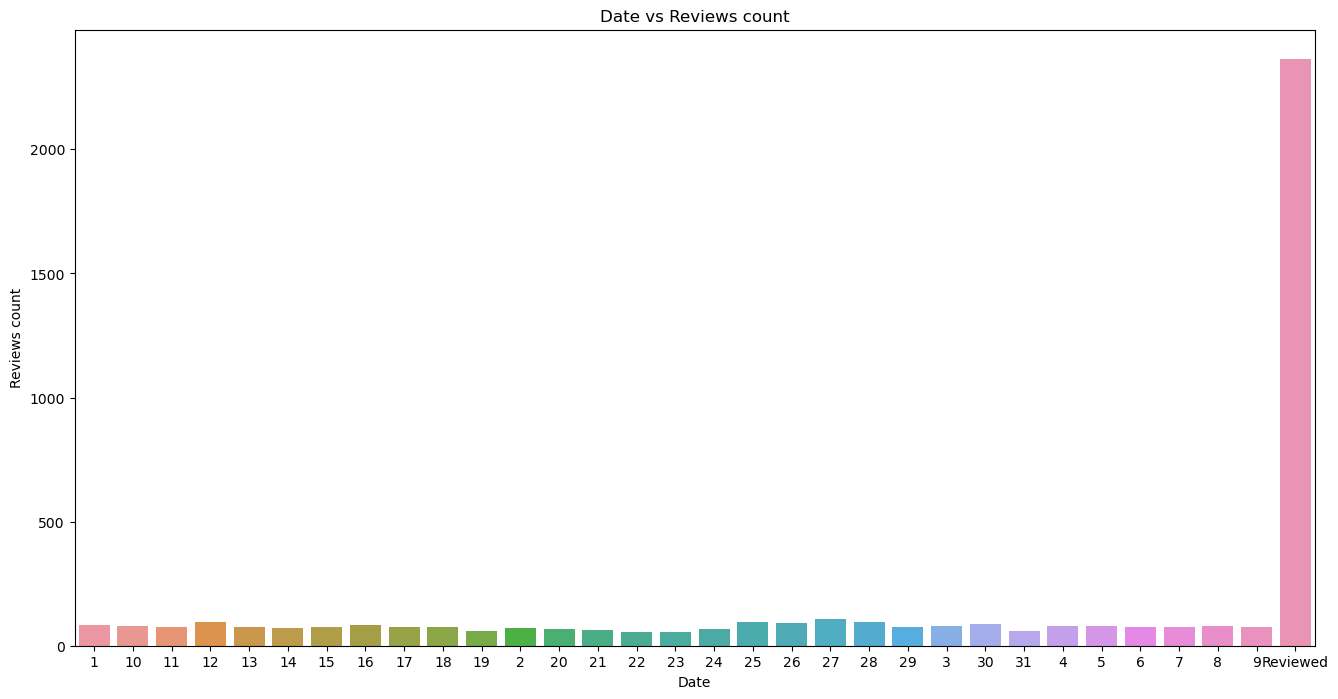

In [188]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

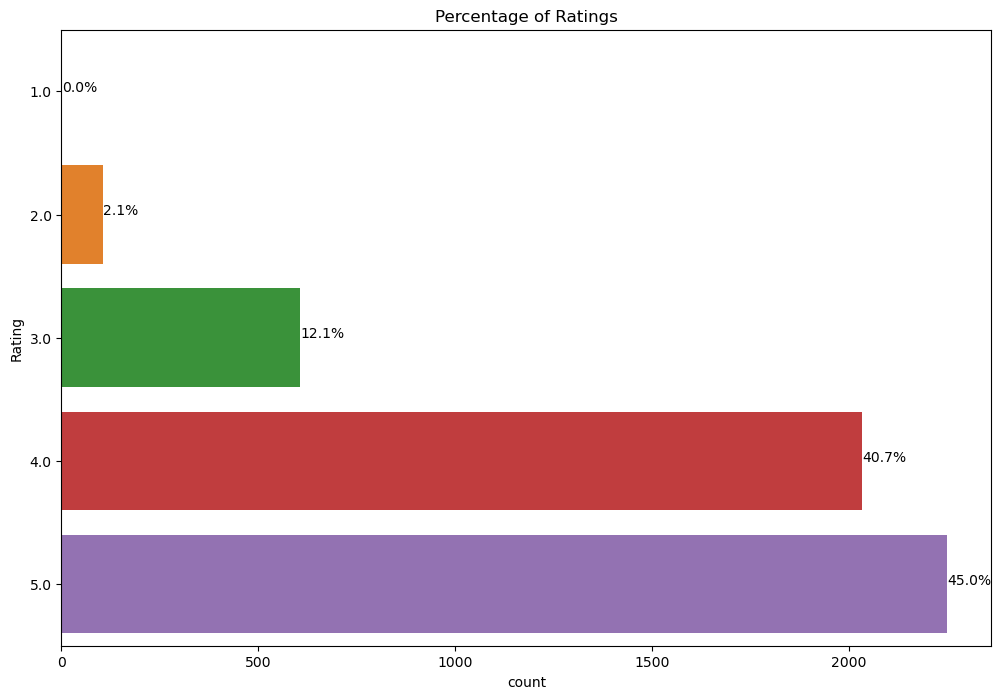

In [189]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

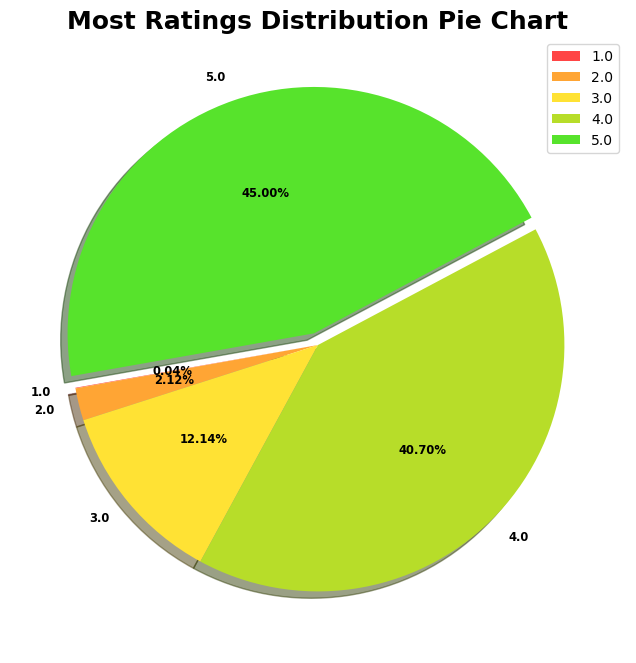

In [190]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### BasicText Preprocessing

### For Sentiment Analysis

In [192]:
data = df[['Review']]
data

,Review
0,A Midrange phone from oneplus. why I choose th...
1,I was searching a smartphone in 25-30k segment...
2,Reviewing about the phone after being used sin...
3,"*Battery life is decent, if you're a heavy use..."
4,Bought in big billion day sale but towards the...
...,...
4995,Must buy phone OnePlus rocks
4996,Good product
4997,Very good hand set but batary charg not enufhh
4998,Good


In [193]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [194]:
data

,Review
0,a midrange phone oneplus. i choose phone brand...
1,i searching smartphone 25-30k segment checked ...
2,reviewing phone used since 4 months.a phone aw...
3,"*battery life decent, heavy user get backup 12..."
4,bought big billion day sale towards end. my ex...
...,...
4995,must buy phone oneplus rocks
4996,good product
4997,very good hand set batary charg enufhh
4998,good


In [195]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [196]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,midrange phone oneplus choose phone brand valu...,A Midrange phone from oneplus. why I choose th...
1,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
2,reviewing phone used since month phone awesome...,Reviewing about the phone after being used sin...
3,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
4,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...


### Removing links (http | https)

In [197]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,midrange phone oneplus choose phone brand valu...,A Midrange phone from oneplus. why I choose th...
1,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
2,reviewing phone used since month phone awesome...,Reviewing about the phone after being used sin...
3,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
4,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
5,six month use would like say good phone price ...,After the six months of use i would like to sa...
6,one established brand paying premium price mob...,One+ has established itself as a brand so payi...
7,somewhat disappointment display many brand pro...,"Somewhat disappointment on display, many brand..."
8,camera quality good except feature quiet enoug...,Camera quality is not very good and except thi...
9,u game addict phone uhh game like bgmi nd batt...,If u are not a game addict then this phone is ...


### Removing Review with empty text

In [198]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,midrange phone oneplus choose phone brand valu...,A Midrange phone from oneplus. why I choose th...
1,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
2,reviewing phone used since month phone awesome...,Reviewing about the phone after being used sin...
3,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
4,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
5,six month use would like say good phone price ...,After the six months of use i would like to sa...
6,one established brand paying premium price mob...,One+ has established itself as a brand so payi...
7,somewhat disappointment display many brand pro...,"Somewhat disappointment on display, many brand..."
8,camera quality good except feature quiet enoug...,Camera quality is not very good and except thi...
9,u game addict phone uhh game like bgmi nd batt...,If u are not a game addict then this phone is ...


### Dropping duplicate rows

In [199]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,midrange phone oneplus choose phone brand valu...,A Midrange phone from oneplus. why I choose th...
1,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
2,reviewing phone used since month phone awesome...,Reviewing about the phone after being used sin...
3,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
4,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
5,six month use would like say good phone price ...,After the six months of use i would like to sa...
6,one established brand paying premium price mob...,One+ has established itself as a brand so payi...
7,somewhat disappointment display many brand pro...,"Somewhat disappointment on display, many brand..."
8,camera quality good except feature quiet enoug...,Camera quality is not very good and except thi...
9,u game addict phone uhh game like bgmi nd batt...,If u are not a game addict then this phone is ...


### Resetting index

In [200]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,midrange phone oneplus choose phone brand valu...,A Midrange phone from oneplus. why I choose th...
1,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
2,reviewing phone used since month phone awesome...,Reviewing about the phone after being used sin...
3,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
4,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
5,six month use would like say good phone price ...,After the six months of use i would like to sa...
6,one established brand paying premium price mob...,One+ has established itself as a brand so payi...
7,somewhat disappointment display many brand pro...,"Somewhat disappointment on display, many brand..."
8,camera quality good except feature quiet enoug...,Camera quality is not very good and except thi...
9,u game addict phone uhh game like bgmi nd batt...,If u are not a game addict then this phone is ...


### Removing Punctuations, Numbers and Special characters

In [201]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [202]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,midrange phone oneplus choose phone brand valu...,A Midrange phone from oneplus. why I choose th...
1,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
2,reviewing phone used since month phone awesome...,Reviewing about the phone after being used sin...
3,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
4,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
5,six month use would like say good phone price ...,After the six months of use i would like to sa...
6,one established brand paying premium price mob...,One+ has established itself as a brand so payi...
7,somewhat disappointment display many brand pro...,"Somewhat disappointment on display, many brand..."
8,camera quality good except feature quiet enoug...,Camera quality is not very good and except thi...
9,u game addict phone uhh game like bgmi nd batt...,If u are not a game addict then this phone is ...


### Function to remove emoji

In [203]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [204]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,midrange phone oneplus choose phone brand valu...,A Midrange phone from oneplus. why I choose th...
1,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...
2,reviewing phone used since month phone awesome...,Reviewing about the phone after being used sin...
3,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use..."
4,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...
5,six month use would like say good phone price ...,After the six months of use i would like to sa...
6,one established brand paying premium price mob...,One+ has established itself as a brand so payi...
7,somewhat disappointment display many brand pro...,"Somewhat disappointment on display, many brand..."
8,camera quality good except feature quiet enoug...,Camera quality is not very good and except thi...
9,u game addict phone uhh game like bgmi nd batt...,If u are not a game addict then this phone is ...


In [205]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,midrange phone oneplus choose phone brand valu...,A Midrange phone from oneplus. why I choose th...,"[midrange, phone, oneplus, choose, phone, bran..."
1,searching smartphone k segment checked lot pho...,I was searching a smartphone in 25-30k segment...,"[searching, smartphone, k, segment, checked, l..."
2,reviewing phone used since month phone awesome...,Reviewing about the phone after being used sin...,"[reviewing, phone, used, since, month, phone, ..."
3,battery life decent heavy user get backup hr c...,"*Battery life is decent, if you're a heavy use...","[battery, life, decent, heavy, user, get, back..."
4,bought big billion day sale towards end experi...,Bought in big billion day sale but towards the...,"[bought, big, billion, day, sale, towards, end..."
5,six month use would like say good phone price ...,After the six months of use i would like to sa...,"[six, month, use, would, like, say, good, phon..."
6,one established brand paying premium price mob...,One+ has established itself as a brand so payi...,"[one, established, brand, paying, premium, pri..."
7,somewhat disappointment display many brand pro...,"Somewhat disappointment on display, many brand...","[somewhat, disappointment, display, many, bran..."
8,camera quality good except feature quiet enoug...,Camera quality is not very good and except thi...,"[camera, quality, good, except, feature, quiet..."
9,u game addict phone uhh game like bgmi nd batt...,If u are not a game addict then this phone is ...,"[u, game, addict, phone, uhh, game, like, bgmi..."
